In [32]:
#importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') #supress warnings
#visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
#data reading
data = pd.DataFrame(pd.read_csv(r'C:/Users/FAZAL/Downloads/house_price.csv.csv'))
data.head()

,area_type,location,society,size,total_sqft,sqft,bath,balcony,possession date,price
0,Super built-up Area,Electronic City Phase II,Coomee,2 BHK,1056,1056.0,2.0,1.0,44192,39.07
1,Plot Area,Chikka Tirupathi,Theanmp,4 Bedroom,2600,2600.0,5.0,3.0,Ready to move,120.00
2,Built-up Area,Uttarahalli,NaN,3 BHK,1440,1440.0,2.0,3.0,Ready to move,62.00
3,Super built-up Area,Lingadheeranahalli,Soiewre,3 BHK,1521,1521.0,3.0,1.0,Ready to move,95.00
4,Super built-up Area,Kothanur,NaN,2 BHK,1200,1200.0,2.0,1.0,Ready to move,51.00


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13314 entries, 0 to 13313
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area_type        13314 non-null  object 
 1   location         13314 non-null  object 
 2   society          7817 non-null   object 
 3   size             13298 non-null  object 
 4   total_sqft       13314 non-null  object 
 5   sqft             13314 non-null  float64
 6   bath             13241 non-null  float64
 7   balcony          12706 non-null  float64
 8   possession date  13314 non-null  object 
 9   price            13314 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.0+ MB


<h2>Data cleaning</h2>

In [35]:
#checking for null values
data.isna().sum()

area_type             0
location              0
society            5497
size                 16
total_sqft            0
sqft                  0
bath                 73
balcony             608
possession date       0
price                 0
dtype: int64

In [36]:
#lets drop society column due to many missing values
data = data.drop("society", axis=1)
data.head()

,area_type,location,size,total_sqft,sqft,bath,balcony,possession date,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,1056.0,2.0,1.0,44192,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,2600.0,5.0,3.0,Ready to move,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,1440.0,2.0,3.0,Ready to move,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,1521.0,3.0,1.0,Ready to move,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,1200.0,2.0,1.0,Ready to move,51.00


In [37]:
#lets drop repeated column
data = data.drop("total_sqft", axis=1)
data.head()

,area_type,location,size,sqft,bath,balcony,possession date,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,44192,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,Ready to move,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,Ready to move,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,Ready to move,95.00
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,Ready to move,51.00


In [38]:
#lets drop unneccesary column
data = data.drop("possession date", axis=1)
data.head()

,area_type,location,size,sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [39]:
#dropping rows having missing values
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12706 entries, 0 to 13313
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area_type  12706 non-null  object 
 1   location   12706 non-null  object 
 2   size       12706 non-null  object 
 3   sqft       12706 non-null  float64
 4   bath       12706 non-null  float64
 5   balcony    12706 non-null  float64
 6   price      12706 non-null  float64
dtypes: float64(4), object(3)
memory usage: 794.1+ KB


In [40]:
#No missing values
data.isna().sum()

area_type    0
location     0
size         0
sqft         0
bath         0
balcony      0
price        0
dtype: int64

In [41]:
data.head()

,area_type,location,size,sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [42]:
#checking for duplicate values
data.duplicated().sum()

685

In [43]:
#removing duplicates
data.drop_duplicates(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12021 entries, 0 to 13312
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area_type  12021 non-null  object 
 1   location   12021 non-null  object 
 2   size       12021 non-null  object 
 3   sqft       12021 non-null  float64
 4   bath       12021 non-null  float64
 5   balcony    12021 non-null  float64
 6   price      12021 non-null  float64
dtypes: float64(4), object(3)
memory usage: 751.3+ KB


In [44]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [45]:
#lets convert string data to numeric
data['area_type'] = data['area_type'].map({'Super built-up  Area': 1, 'Built-up  Area': 2,'Carpet  Area':3,'Plot  Area':4})
data.head()

,area_type,location,size,sqft,bath,balcony,price
0,1,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,4,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,1,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,1,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [46]:
data["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [47]:
data['size'] = data['size'].map({'1 RK':0.5,'1 BHK':1,'1 Bedroom': 1,'2 BHK':2,'2 Bedroom': 2, 
'3 BHK':3,'3 Bedroom': 3,'4 BHK':4,'4 Bedroom': 4,'5 BHK':5,'5 Bedroom': 5,'6 BHK':6,'6 Bedroom': 6,
'7 BHK':7,'7 Bedroom': 7,'8 BHK':8,'8 Bedroom': 8,'9 BHK':9,'9 Bedroom': 9,'10 Bedroom':10,'11 BHK':11,'11 Bedroom': 11,
'12 Bedroom':12, '13 BHK':13,'14 BHK':14,'27 BHK':27,'43 Bedroom':43}).astype("float64")
data.head()

,area_type,location,size,sqft,bath,balcony,price
0,1,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,4,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,2,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,1,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,1,Kothanur,2.0,1200.0,2.0,1.0,51.00


In [48]:
data["size"].unique()

array([ 2. ,  4. ,  3. ,  1. ,  0.5,  6. ,  8. ,  7. ,  5. , 11. ,  9. ,
       27. , 43. , 14. , 12. , 10. , 13. ])

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12021 entries, 0 to 13312
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area_type  12021 non-null  int64  
 1   location   12021 non-null  object 
 2   size       12021 non-null  float64
 3   sqft       12021 non-null  float64
 4   bath       12021 non-null  float64
 5   balcony    12021 non-null  float64
 6   price      12021 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 751.3+ KB


In [50]:
data.describe()

,area_type,size,sqft,bath,balcony,price
count,12021.000000,12021.000000,1.202100e+04,12021.000000,12021.000000,12021.000000
mean,1.649114,2.752558,1.808113e+03,2.635055,1.584061,108.147158
std,1.064632,1.225941,1.501786e+04,1.244889,0.824858,134.751036
min,1.000000,0.500000,4.500000e+01,1.000000,0.000000,8.000000
25%,1.000000,2.000000,1.100000e+03,2.000000,1.000000,50.000000
50%,1.000000,3.000000,1.270000e+03,2.000000,2.000000,70.000000
75%,2.000000,3.000000,1.650000e+03,3.000000,2.000000,117.000000
max,4.000000,43.000000,1.306800e+06,40.000000,3.000000,2912.000000


<h3>Treating outliers</h3>

<Axes: xlabel='price', ylabel='Density'>

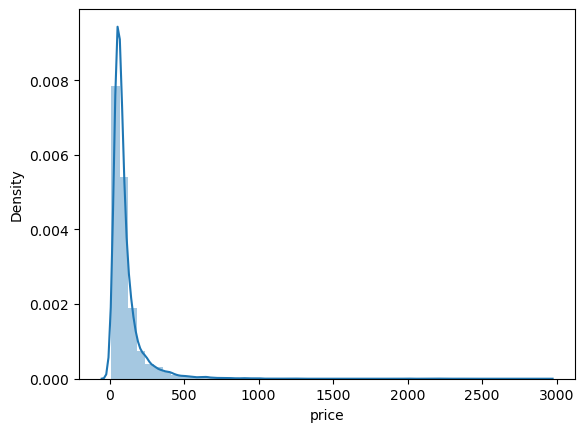

In [51]:
#create distribution plot
sns.distplot(data['price'])

<Axes: >

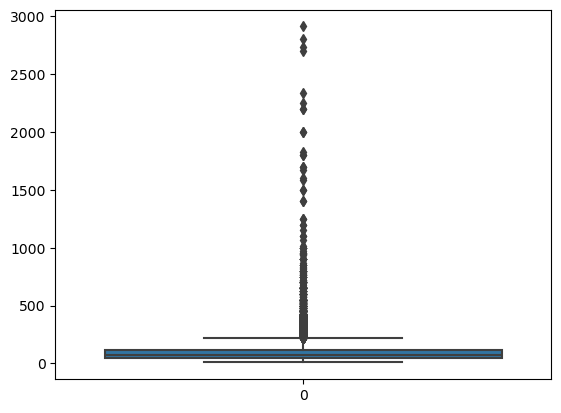

In [52]:
sns.boxplot(data['price'])

In [53]:
print("Mean is : ", data['price'].mean())
print("Median is : ",data['price'].median())
print("Mode is :", data['price'].mode())

Mean is :  108.14715789035853
Median is :  70.0
Mode is : 0    75.0
Name: price, dtype: float64


In [54]:
#fixing outliers
percentile25 = data['price'].quantile(0.25)
percentile75 = data['price'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 217.5
Lower limit -50.5


In [55]:
new_data= data[data['price'] < upper_limit]
new_data.shape

(10889, 7)

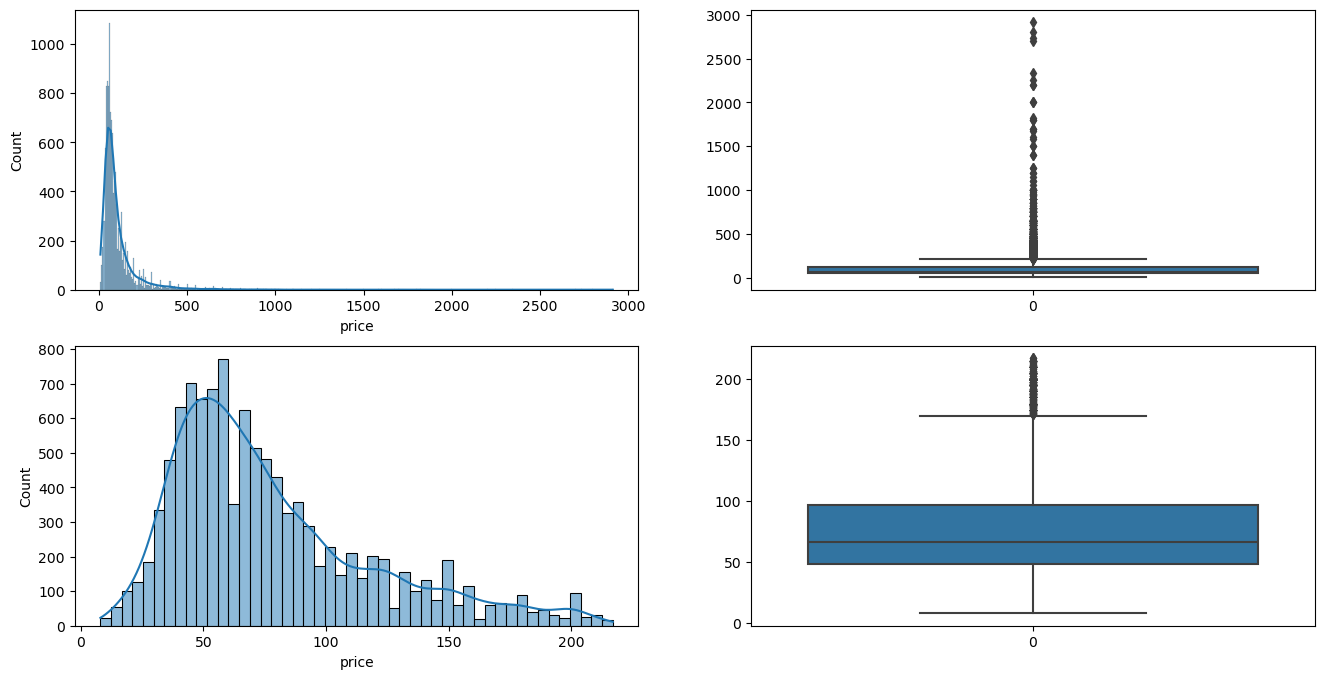

In [56]:
#Comparing before and after outliers

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(data['price'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = data['price'])

plt.subplot(2,2,3)
sns.histplot(new_data['price'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(data = new_data['price'])

plt.show()

<h2>Creating model</h2>

In [57]:
#selecting input and output columns
features = new_data[['area_type','size','sqft','bath','balcony']]

label = new_data['price']

In [58]:
#spliting training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0)
#training the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [59]:
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,features.columns,columns=['Coefficient'])
coeff_df

10.824546703707085


,Coefficient
area_type,3.161840
size,5.570146
sqft,0.000052
bath,17.600030
balcony,2.586521


In [60]:
#applying model for predictions
predictions = lm.predict(X_test)

In [61]:
#evaluating the model
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 24.625439930247108
MSE: 1110.4297230261834
RMSE: 33.32311094460095
